# **Litter Detection with YOLOv8s - AIN420 Project**

#### **Author:** Arif Enes Aydın

---


In [ ]:
!pip -q --no-cache-dir install gdown # used for downloading dataset
!pip -q install ultralytics
import torch

from IPython import display
display.clear_output()

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 23.3/166.8 GB disk)


Downloading the dataset and the .yaml file from Google Drive using *gdown*.

The dataset is composed of these two datasets: [PlastOPol](https://zenodo.org/record/5829156) and [TACO](https://zenodo.org/record/3587843).

It has 3150 litter images in total, and it is splitted into train, validation and test sets as 75%, 10%, and 15% respectively.

In [ ]:
!gdown 1szvMerJx4vxVhYZexYrc7XKUYn3iKIsG # dataset
!gdown 1eqKBmUMknAKwlcJ-2TUnE16PjRh-dIbc # yaml file
!unzip -q "/content/plastopol-taco-v2.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1szvMerJx4vxVhYZexYrc7XKUYn3iKIsG
To: /content/plastopol-taco-v2.zip
100% 896M/896M [00:09<00:00, 92.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1eqKBmUMknAKwlcJ-2TUnE16PjRh-dIbc
To: /content/litter_detection.yaml
100% 370/370 [00:00<00:00, 2.74MB/s]


In [ ]:
!mkdir datasets
!mv /content/litter_detection.yaml /content/datasets

Training the *yolov8s* model.

In [ ]:
%%time
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/litter_detection.yaml batch=-1 epochs=300 imgsz=640 optimizer=Adam lr0=0.001 patience=50 augment=True cache=True

100% 21.5M/21.5M [00:00<00:00, 74.4MB/s]
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/litter_detection.yaml, epochs=300, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/litter_detection.yaml

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/data/labels/val.cache... 316 images, 0 backgrounds, 0 corrupt: 100% 316/316 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 20/20 [00:05<00:00,  3.47it/s]
                   all        316        754      0.814      0.696       0.78      0.624
Speed: 0.8ms preprocess, 3.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


Getting results on the test set using trained model.

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=data/images/test save=True

Some results:

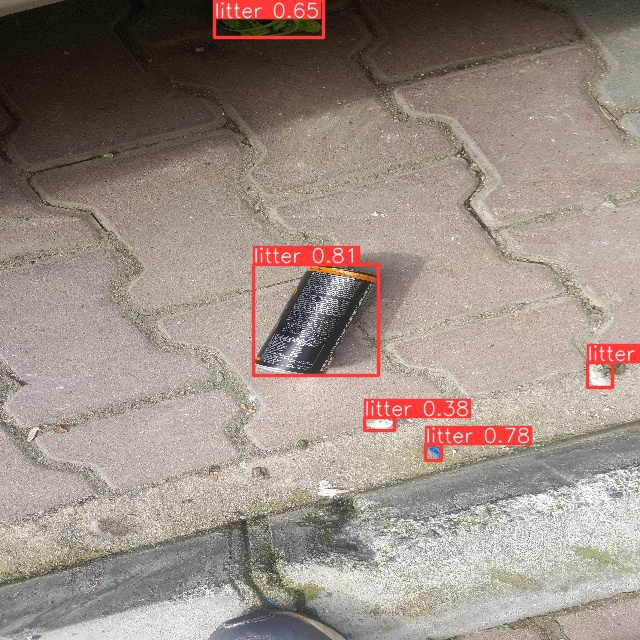

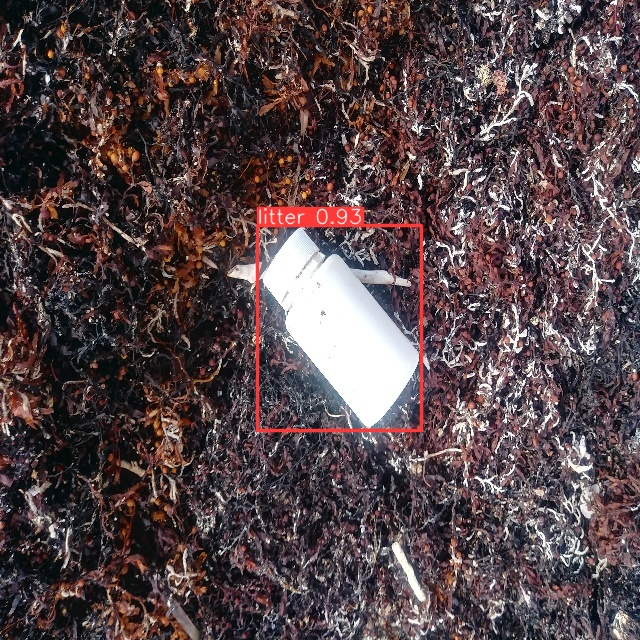

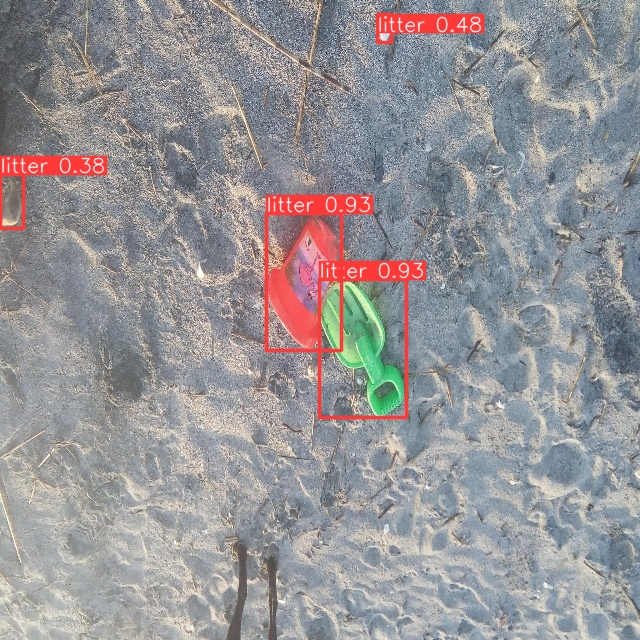

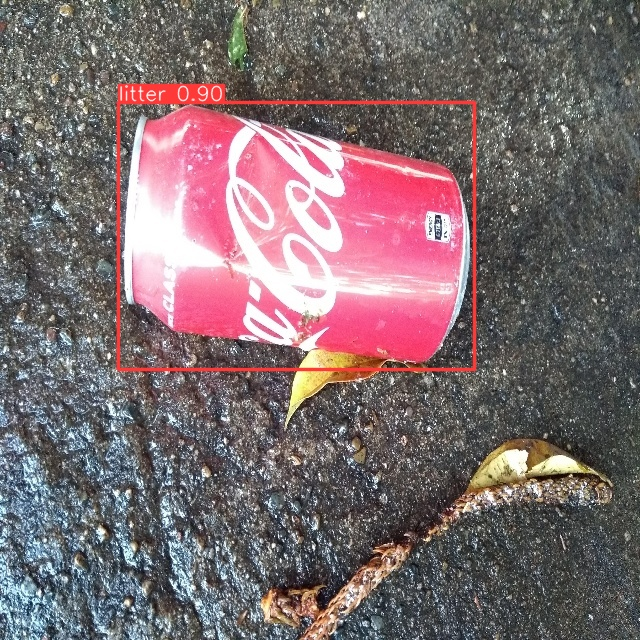

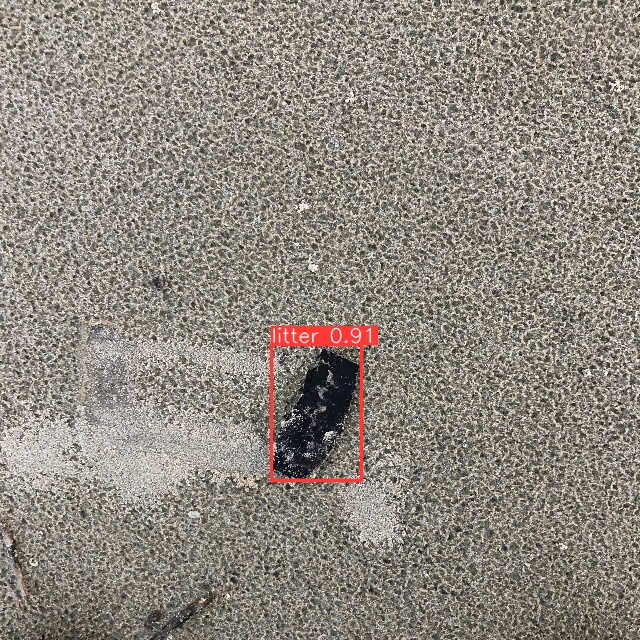

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=320))
      print("\n")

---
Saving the results:

In [ ]:
!zip -qr /content/train_results.zip /content/runs/detect/train/
from google.colab import files
files.download("/content/train_results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -qr /content/val_results.zip /content/runs/detect/val/
from google.colab import files
files.download("/content/val_results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -qr /content/test_results.zip /content/runs/detect/predict/
from google.colab import files
files.download("/content/test_results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>